In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
folder = 'Tyrannosaurus rex'
file = 'Tyrannosaurus rex.csv'

In [0]:
folder = 'Velociraptor'
file = 'Velociraptor.csv'

In [0]:
folder = 'Allosaurus'
file = 'Allosaurus.csv'

In [0]:
folder = 'Spinosaurus'
file = 'Spinosaurus.csv'

In [0]:
folder = 'Deinonychus'
file = 'Deinonychus.csv'

In [0]:
folder = 'Carnotaurus'
file = 'Carnotaurus.csv'

In [0]:
folder = 'Apatosaurus'
file = 'Apatosaurus.csv'

In [0]:
folder = 'Diplodocus'
file = 'Diplodocus.csv'

In [0]:
folder = 'Brachiosaurus'
file = 'Brachiosaurus.csv'

In [0]:
folder = 'Stegosaurus'
file = 'Stegosaurus.csv'

In [0]:
folder = 'Ankylosaurus'
file = 'Ankylosaurus.csv'

In [0]:
folder = 'Triceratops'
file = 'Triceratops.csv'

In [0]:
folder = 'Iguanodon'
file = 'Iguanodon.csv'

In [0]:
folder = 'Parasaurolophus'
file = 'Parasaurolophus.csv'

In [0]:
path = Path(base_dir + 'data/dinos')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
classes = ['Tyrannosaurus rex', 'Velociraptor','Allosaurus','Spinosaurus','Deinonychus','Carnotaurus','Apatosaurus','Diplodocus','Brachiosaurus','Stegosaurus','Ankylosaurus','Triceratops','Iguanodon','Parasaurolophus']

**Delete files which are corrupt**

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [51]:
data.classes

['Allosaurus',
 'Ankylosaurus',
 'Apatosaurus',
 'Brachiosaurus',
 'Carnotaurus',
 'Deinonychus',
 'Diplodocus',
 'Iguanodon',
 'Parasaurolophus',
 'Spinosaurus',
 'Stegosaurus',
 'Triceratops',
 'Tyrannosaurus rex',
 'Velociraptor']

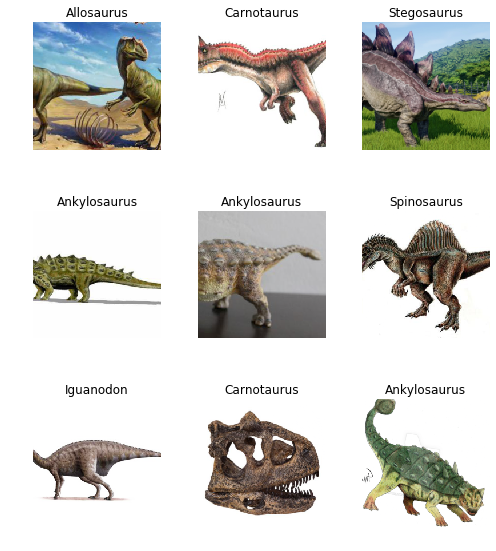

In [52]:
data.show_batch(rows=3, figsize=(7,8))

In [53]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Allosaurus',
  'Ankylosaurus',
  'Apatosaurus',
  'Brachiosaurus',
  'Carnotaurus',
  'Deinonychus',
  'Diplodocus',
  'Iguanodon',
  'Parasaurolophus',
  'Spinosaurus',
  'Stegosaurus',
  'Triceratops',
  'Tyrannosaurus rex',
  'Velociraptor'],
 14,
 1150,
 287)

**Train the model**

In [54]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 51930014.55it/s]


In [55]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.956345,1.988783,0.658537,00:20
1,2.254030,1.529721,0.494774,00:19
2,1.827742,1.453345,0.501742,00:19
3,1.572369,1.439845,0.505226,00:20


In [0]:
learn.save('stage-1')

fine tuning the model

In [0]:
learn.unfreeze()

In [58]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


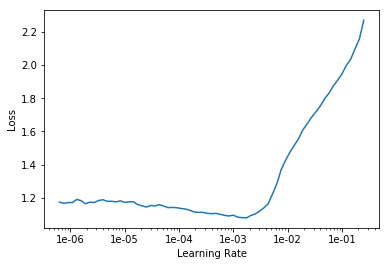

In [59]:
learn.recorder.plot()

In [60]:
learn.fit_one_cycle(4, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.145153,1.349247,0.449477,00:20
1,1.025105,1.230795,0.393728,00:20
2,0.888827,1.158967,0.362369,00:20
3,0.791398,1.154671,0.372822,00:20


The above model looks way better so we will use that!!

In [0]:
learn.save('stage-2')

In [62]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (1150 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tyrannosaurus rex,Tyrannosaurus rex,Tyrannosaurus rex,Tyrannosaurus rex,Tyrannosaurus rex
Path: /content/gdrive/My Drive/fastai-v3/data/dinos;

Valid: LabelList (287 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Apatosaurus,Apatosaurus,Apatosaurus,Ankylosaurus,Brachiosaurus
Path: /content/gdrive/My Drive/fastai-v3/data/dinos;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): 

**Interpreting our model**

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

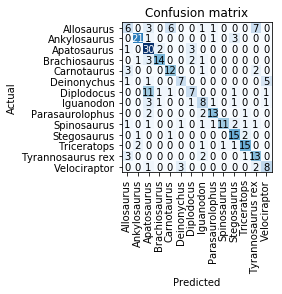

In [64]:
interp.plot_confusion_matrix()

**Put the model into production**

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

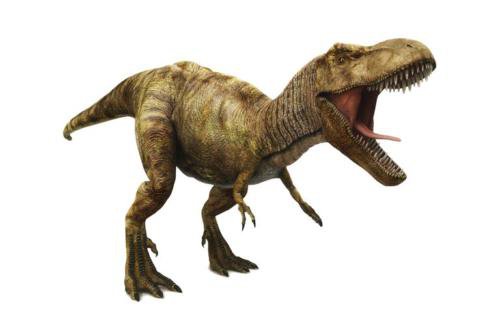

In [73]:
img = open_image(path/'Tyrannosaurus rex'/'00000025.jpg')
img

In [0]:
learn = load_learner(path)

In [75]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Tyrannosaurus rex